<a href="https://colab.research.google.com/github/lucylao/data_analytics/blob/main/COVID19_DATA_ANALYSIS_Assignment_LaoLucy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import datetime

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [5]:
# import data

df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [6]:
# stat summary of data

df.describe()

,fips,cases,deaths
count,17669.000000,1.766900e+04,17669.000000
mean,31.910861,1.190759e+05,2984.598053
std,18.640163,2.274607e+05,5554.979599
min,1.000000,1.000000e+00,0.000000
25%,17.000000,4.587000e+03,98.000000
50%,31.000000,3.417400e+04,774.000000
75%,46.000000,1.334700e+05,3324.000000
max,78.000000,3.006583e+06,40570.000000


In [7]:
# show columns and first five rows

df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [9]:
# show columns and last five rows

df.tail()

,date,state,fips,cases,deaths
17664,2021-01-17,Virginia,51,439305,5729
17665,2021-01-17,Washington,53,293296,3971
17666,2021-01-17,West Virginia,54,108821,1776
17667,2021-01-17,Wisconsin,55,568166,5907
17668,2021-01-17,Wyoming,56,49363,522


In [8]:
# checking data types

df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [64]:
# change 'date' data type to datetime
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

**1. Analyzing New York state data for Covid 19**

In [10]:
# extract New York data into new data frame

New_York_df = df[df['state'] == 'New York']
New_York_df

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0
...,...,...,...,...,...
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997
17537,2021-01-15,New York,36,1213179,40203
17592,2021-01-16,New York,36,1229124,40376


In [11]:
# What is the average daily case count?

Avg_Cases = New_York_df['cases'].mean()
Avg_Cases

449848.14241486066

In [12]:
# What is the average daily death count?

Avg_Deaths = New_York_df['deaths'].mean()
Avg_Deaths

27816.811145510837

In [13]:
# Delete 'fips' column from data frame. Extraneous data

NY_df = New_York_df.drop('fips', axis = 1)
NY_df

,date,state,cases,deaths
246,2020-03-01,New York,1,0
261,2020-03-02,New York,1,0
276,2020-03-03,New York,2,0
293,2020-03-04,New York,11,0
313,2020-03-05,New York,22,0
...,...,...,...,...
17427,2021-01-13,New York,1179523,39760
17482,2021-01-14,New York,1193710,39997
17537,2021-01-15,New York,1213179,40203
17592,2021-01-16,New York,1229124,40376


In [19]:
# change date to datetime
NY_df['date'] = pd.to_datetime(NY_df['date'])
NY_df['date']

246     2020-03-01
261     2020-03-02
276     2020-03-03
293     2020-03-04
313     2020-03-05
           ...    
17427   2021-01-13
17482   2021-01-14
17537   2021-01-15
17592   2021-01-16
17647   2021-01-17
Name: date, Length: 323, dtype: datetime64[ns]

In [20]:
# check data types
NY_df.dtypes

date      datetime64[ns]
state             object
cases              int64
deaths             int64
dtype: object

In [21]:
NY_df

,date,state,cases,deaths
246,2020-03-01,New York,1,0
261,2020-03-02,New York,1,0
276,2020-03-03,New York,2,0
293,2020-03-04,New York,11,0
313,2020-03-05,New York,22,0
...,...,...,...,...
17427,2021-01-13,New York,1179523,39760
17482,2021-01-14,New York,1193710,39997
17537,2021-01-15,New York,1213179,40203
17592,2021-01-16,New York,1229124,40376


In [ ]:
# change date values to "mmyy" format and create new data frame

# NY_month_df = pd.datetime(NY_df['date'], format = "%m%Y")

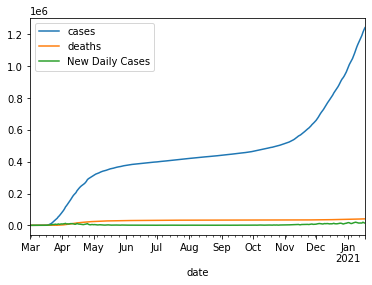

In [26]:
# Plot cases and deaths over time

NY_df.plot(x='date')

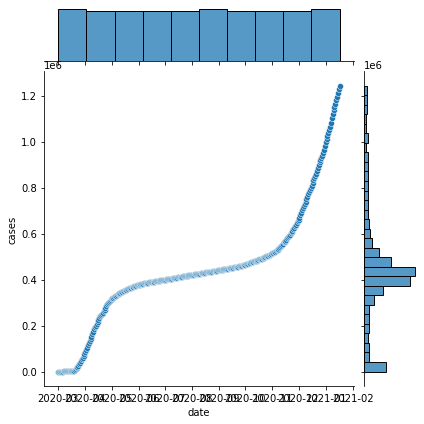

In [23]:
# graphing cases over time

sns.jointplot(x='date', y='cases', data=NY_df)

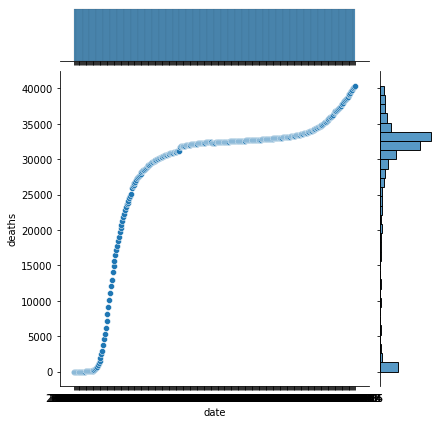

In [ ]:
# plotting deaths over time

sns.jointplot(x='date', y='deaths', data=NY_df)

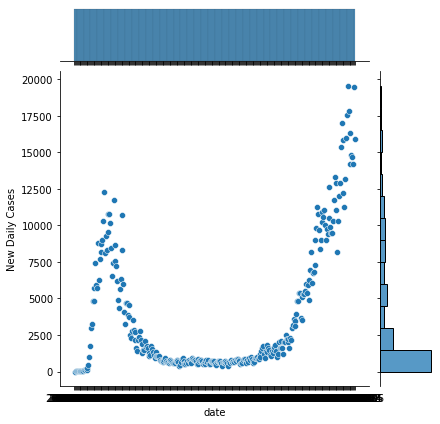

In [ ]:
# new daily cases over time

sns.jointplot(x='date', y='New Daily Cases', data=NY_df)

**2. Find new covid 19 cases daily basis (new cases added everyday)**

In [24]:
difference = NY_df['cases'].diff()
difference


246          NaN
261          0.0
276          1.0
293          9.0
313         11.0
          ...   
17427    14704.0
17482    14187.0
17537    19469.0
17592    15945.0
17647    13694.0
Name: cases, Length: 323, dtype: float64

In [25]:
# add 'difference' column to dataframe

NY_df['New Daily Cases'] = difference
NY_df

,date,state,cases,deaths,New Daily Cases
246,2020-03-01,New York,1,0,NaN
261,2020-03-02,New York,1,0,0.0
276,2020-03-03,New York,2,0,1.0
293,2020-03-04,New York,11,0,9.0
313,2020-03-05,New York,22,0,11.0
...,...,...,...,...,...
17427,2021-01-13,New York,1179523,39760,14704.0
17482,2021-01-14,New York,1193710,39997,14187.0
17537,2021-01-15,New York,1213179,40203,19469.0
17592,2021-01-16,New York,1229124,40376,15945.0


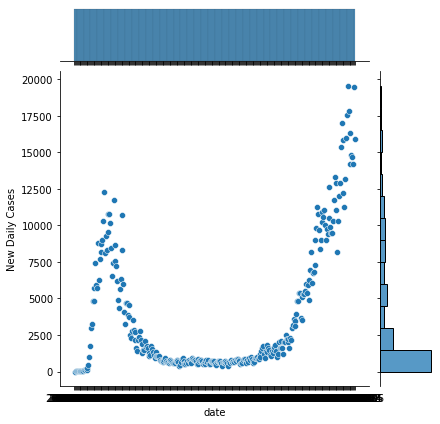

In [ ]:
# plotting New Cases over time

sns.jointplot(x='date', y='New Daily Cases', data=NY_df)

# Task4: Understand NY covid 19 data in last 30 days

In [27]:
# new dataframe for last 30 days

Last_30_days_df = NY_df.tail(30)
Last_30_days_df

,date,state,cases,deaths,New Daily Cases
16052,2020-12-19,New York,841946,35897,9913.0
16107,2020-12-20,New York,851400,36017,9454.0
16162,2020-12-21,New York,860856,36147,9456.0
16217,2020-12-22,New York,871155,36300,10299.0
16272,2020-12-23,New York,882895,36454,11740.0
16327,2020-12-24,New York,896242,36604,13347.0
16382,2020-12-25,New York,909123,36739,12881.0
16437,2020-12-26,New York,920171,36870,11048.0
16492,2020-12-27,New York,928376,37000,8205.0
16547,2020-12-28,New York,938710,37118,10334.0


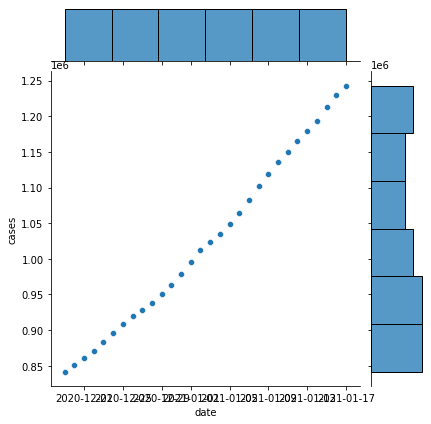

In [28]:
# plotting cases over last 30 days

sns.jointplot(x='date', y='cases', data=Last_30_days_df)


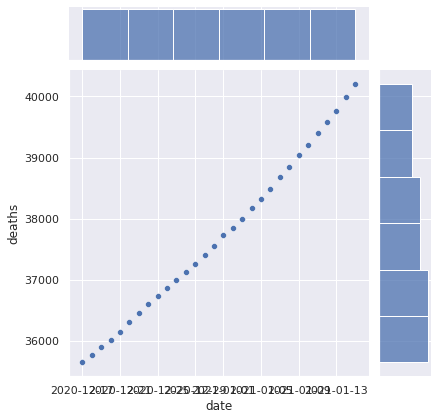

In [ ]:
# plotting death over last 30 days

sns.jointplot(x='date', y='deaths', data=Last_30_days_df)

# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [29]:
# new data frame with selected states for comparison

#comparision_df = df[df['state'] == ('New York','California' , 'Florida' , 'Texas' , 'Arizona')]
#comparision_df

In [38]:
# sort dataframe after July

# reindex__date_df = comparision_df.set_index['date'] > '2020-07-31'

# California_df['date'] == [(2020-07-31):]
# California_df.set_index('date')

SyntaxError: ignored

In [65]:
# state-by-state data frame

California_df = df[df['state'] == 'California']
Florida_df = df[df['state'] == 'Florida']
Texas_df = df[df['state'] == 'Texas']
Arizona_df = df[df['state'] == 'Arizona']


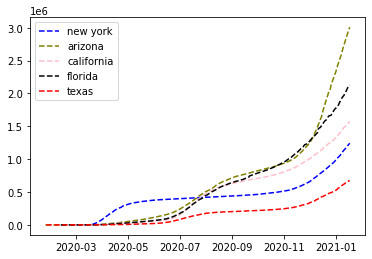

In [66]:
# plot state comparision of cases after July 2020

plt.plot( 'date', 'cases', data=NY_df, marker='',color='blue',  linestyle='dashed',label='new york')
plt.plot( 'date', 'cases', data=California_df, marker='', color='olive', linestyle='dashed',label='arizona')
plt.plot( 'date', 'cases', data=Florida_df, marker='', color='pink', linestyle='dashed', label="california")
plt.plot( 'date', 'cases', data=Texas_df, marker='', color='black',  linestyle='dashed', label="florida")
plt.plot( 'date', 'cases', data=Arizona_df, marker='', color='red',  linestyle='dashed', label="texas")
plt.legend()

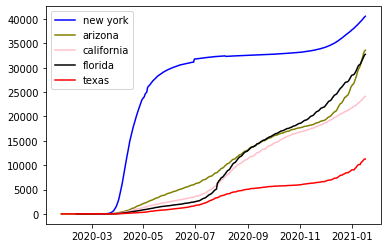

In [70]:
# plot state comparision of deaths after July 2020

plt.plot( 'date', 'deaths', data=NY_df, marker='',color='blue',  linestyle='solid',label='new york')
plt.plot( 'date', 'deaths', data=California_df, marker='', color='olive', linestyle='solid',label='arizona')
plt.plot( 'date', 'deaths', data=Florida_df, marker='', color='pink', linestyle='solid', label="california")
plt.plot( 'date', 'deaths', data=Texas_df, marker='', color='black',  linestyle='solid', label="florida")
plt.plot( 'date', 'deaths', data=Arizona_df, marker='', color='red',  linestyle='solid', label="texas")
plt.legend()

# Task6: Conclusion

Below are the conclusions:



1.   Conclusion 1
     --Your text here
2.   Conclusion 2
     --Your text here>



In [ ]:
1) Since March 1, 2020, cases and deaths from COVID-19 have been increasing on an upward curve.
2) The average daily case count is 447,385.
3) The average daily death count is 27,777.
4) In the beginning, the case count and the death count were both increasing. 
As time went on, the death count started to decrease as the case increased. 
This could be attributed to effective treatments and a better understanding of the virus.
5) In the past 30 days, New York as seen a steady increase in both cases and deaths.
Task 5
6) Comparing New York cases to other states after July 2020, we see a leveling of cases until Nov 2020. 
After Nov 2020, cases start rising in five states with the biggest rise in Arizona, Florida and California. 
This is folled by New York and Texas.
Comparising New York total deaths to other states after July 2020, New York still has the highest death toll. 
However, after November 2020, Arizona, Florida and California's death toll is steadily climbing.
Deaths in Arizonia matched then surpased the deaths in Florida.
The rise in cases can be contributed to numerous factors including holiday travel and the 2020 election.